# Predicting Breast Mass Severity from Mammographic Attributes: A Machine Learning Approach

#### *Meha Singal*

## Research Questions
1. How accurately can machine learning algorithms predict the severity (benign or malignant) of breast masses based on mammographic attributes?
2. Which combination of mammographic attributes contributes most significantly to predicting breast mass severity?
3. Do certain machine learning algorithms perform better than others in predicting breast mass severity?

## Motivation
Cancer, specifically breast cancer, has played a big role throughout my life. Multiple extended family members and close friends have gone through and survived breast cancer, as well as my mother having a higher genetic risk for breast cancer, and therefore so do I. Mammograms, especially done regularly, are vital to detecting breast cancer early on. I knew I wanted to center my project around medical data, and thought this dataset would be perfect to create my first machine learning model. While this is just a simple ML project, algorithms like this can be extremely helpful in assisting medical professionals make important diagnoses like cancer.

## Data Setting

**Source**: https://archive.ics.uci.edu/dataset/161/mammographic+mass

**Raw Data Link**: https://archive.ics.uci.edu/static/public/161/data.csv

Each row in this data set represents an instance of a mammographic mass lesion, characterized by various attributes including BI-RADS assessment, patient age, shape, margin, density, and severity.

### Attributes (Variables) of Data:

**BI-RADS** *(Integer, Ordinal)*: Ranging from 1 to 5, indicating the likelihood of malignancy based on the mammogram interpretation, **with 5 being the most likely to be malignant**

**Age** *(Integer)*: The age of the patient in years.

**Shape** *(Integer, Nominal)*: Represents the shape of the mass lesion. Values range from 1 to 4 where

- 1 = round
- 2 = oval
- 3 = lobular
- 4 = irregular

**Margin** *(Integer, Nominal)*: Describes the margin of the mass lesion. Values range from 1 to 5 where

- 1 = circumscribed
- 2 = microlobulated
- 3 = obscured
- 4 = ill-defined
- 5 = spiculated

**Density** *(Integer, Nominal)*: Indicates the density of the mass lesion. Values range from 1 to 4 where

- 1 = high
- 2 = iso
- 3 = low
- 4 = fat-containing

**Severity** (*Integer, Predictive binary variable*): Binary variable indicating the severity of the lesion where

- 0 = benign
- 1 = malignant
  

## Challenge Goals

The two challenge goals that I chose were using a new library, `Plotly`, to create an advanced and interactive visualization, and advanced machine learning using 3 scikit-learn algorithms, `DecisionTreeClassifier`, `LogisticalRegression`, and `KNeighborsClassifier`, for two iterations that use different parameters from the dataset and various cross-validation and `F1` score tests to measure accuracy.

## Collaboration

In [1]:
your_name = "Meha Singal"
sources = [
    "https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/",
    "https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69",
    "https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn",
    "https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot",
    "https://pandas.pydata.org/docs/reference/api/pandas.testing.assert_frame_equal.html",
    "https://medium.com/@ramanish1992/pytest-assertions-and-test-discovery-python-24b4bcb468eb",
    "https://pytest.org/en/stable/how-to/assert.html",
    "https://seaborn.pydata.org/generated/seaborn.countplot.html",
    "https://www.statology.org/pandas-describe-categorical/",
    "https://stackoverflow.com/questions/64223060/summary-of-categorical-variables-pandas",
    "https://archive.ics.uci.edu/dataset/161/mammographic+mass",
    "https://www.markdownguide.org/cheat-sheet/",
    "https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a",
    "https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/",
    "https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html",
    "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html",
    "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html",
    "https://scikit-learn.org/stable/modules/model_evaluation.html",
    "https://scikit-learn.org/stable/modules/grid_search.html",
    "https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-decision-trees",
    "https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier",
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

## Methods

### Data Transformation and Packages

In [1]:
pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached tenacity-8.3.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached tenacity-8.3.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Loading packages
from ucimlrepo import fetch_ucirepo
from matplotlib.patches import Rectangle
from pandas.testing import assert_series_equal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn import metrics

sns.set_theme()

In [4]:
# Code taken from UCI Repository

# fetch dataset 
mammographic_mass = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
X = mammographic_mass.data.features 
y = mammographic_mass.data.targets 
  
# metadata 
print(mammographic_mass.metadata) 
  
# variable information 
print(mammographic_mass.variables) 

{'uci_id': 161, 'name': 'Mammographic Mass', 'repository_url': 'https://archive.ics.uci.edu/dataset/161/mammographic+mass', 'data_url': 'https://archive.ics.uci.edu/static/public/161/data.csv', 'abstract': "Discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 961, 'num_features': 5, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Severity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C53K6Z', 'creators': ['Matthias Elter'], 'intro_paper': {'title': 'The prediction of breast cancer biopsy outcomes using two CAD approaches that both emphasize an intelligible decision process.', 'authors': 'M. Elter, R. Schulz-Wendtland, T. Wittenberg', 'published_in': 'Medical Physic

In [5]:
# Load the dataset
url = "https://archive.ics.uci.edu/static/public/161/data.csv"
data = pd.read_csv(url, na_values="?")
    
# Save the dataset to a CSV file
output_file = "mammographic_masses.csv"
data.to_csv(output_file, index=False)

In [6]:
# Testing dataset (first 10 rows of actual dataset)
mammographic_masses_test = pd.DataFrame({
        "BI-RADS": [5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0],
        "Age": [67.0, 43.0, 58.0, 28.0, 74.0, 65.0, 70.0, 42.0, 57.0, 60.0],
        "Shape": [3.0, 1.0, 4.0, 1.0, 1.0, 1.0, None, 1.0, 1.0, None],
        "Margin": [5.0, 1.0, 5.0, 1.0, 5.0, None, None, None, 5.0, 5.0],
        "Density": [3.0, None, 3.0, 3.0, None, 3.0, 3.0, 3.0, 3.0, 1.0],
        "Severity": [1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
    })

# Save the dataset to a CSV file
output_file = "mammographic_masses_test.csv"
mammographic_masses_test.to_csv(output_file, index=False)
mammographic_masses_test

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


## Loading in the Data

In [7]:
def load_data(file_path):
    """
    Load a CSV file into pandas DataFrame

    Parameters:
    - file_path (str): path to CSV file

    Returns:
    - data (DataFrame): loaded data stored in DataFrame
    """
    
    data = pd.read_csv(file_path)
    
    return data


def test_load_data():
    
    data = load_data("mammographic_masses.csv")

    # Assert DataFrame has correct shape
    assert data.shape[0] == 961, f"Expected 961 rows but got {data.shape[0]}"
    assert data.shape[1] == 6, f"Expected 6 columns but got {data.shape[1]}"

    # Assert correct column names
    columns_expected = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]
    assert list(data.columns) == columns_expected, (
    f"Expected columns {columns_expected} but got {list(data.columns)}"
    )

    # Assert values of top 10 rows are expected
    pd.testing.assert_frame_equal(data.head(10), mammographic_masses_test)

test_load_data()

In [8]:
# Output for Project
mammographic_mass_data = load_data("mammographic_masses.csv")
print(mammographic_mass_data.head(10))

   BI-RADS   Age  Shape  Margin  Density  Severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1
5      4.0  65.0    1.0     NaN      3.0         0
6      4.0  70.0    NaN     NaN      3.0         0
7      5.0  42.0    1.0     NaN      3.0         0
8      5.0  57.0    1.0     5.0      3.0         1
9      5.0  60.0    NaN     5.0      1.0         1


## Data Exploration and Visualization

In [9]:
def summarize_data(file_path):
    """
    Summarizes the categorical data in the CSV file

    Parameters:
    - file_path (str): path to CSV file

    Returns:
    - summary: DataFrame containing summary statistics for each categorical column
    of the dataset, including count, unique values, top value, and frequency
    
    """
    data = pd.read_csv(file_path)
    summary = data.astype('object').describe()
    return summary

def summarize_data_test(file_path):

    summary = summarize_data(file_path).astype(str)

    # Expected summary
    expected_summary = {
        "BI-RADS": {'count': 10.0, 'unique': 2.0, 'top': 5.0, 'freq': 6.0},
        "Age": {'count': 10.0, 'unique': 10.0, 'top': 67.0, 'freq': 1.0},
        "Shape": {'count': 8.0, 'unique': 3.0, 'top': 1.0, 'freq': 6.0},
        "Margin": {'count': 7.0, 'unique': 2.0, 'top': 5.0, 'freq': 5.0},
        "Density": {'count': 8.0, 'unique': 2.0, 'top': 3.0, 'freq': 7.0},
        "Severity": {'count': 10, 'unique': 2, 'top': 1, 'freq': 6}
    }

    # Assert the summary statistics
    for column in expected_summary.keys():
        for stat in expected_summary[column].keys():
            actual_value = summary.loc[stat, column]
            expected_value = str(expected_summary[column][stat])
            assert actual_value == expected_value, (
                f"{column} {stat} does not match: {actual_value} != {expected_value}")

summarize_data_test("mammographic_masses_test.csv") 

In [10]:
# Output for Project
summarize_data("mammographic_masses.csv")

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.0,956.0,930.0,913.0,885.0,961
unique,7.0,73.0,4.0,5.0,4.0,2
top,4.0,59.0,4.0,1.0,3.0,0
freq,547.0,36.0,400.0,357.0,798.0,516


In [11]:
def visualize_age(file_path):
    """
    Visualies the distribution of age in the dataset

    Parameters:
    - file_path (str): path to CSV file

    Returns:
    - plot: Histogram plot showing the distribution of age
    
    """

    # Load in the data
    data = pd.read_csv(file_path)

    # Histogram for Age
    plot = sns.histplot(data['Age'].dropna())
    plot.set(title = "Distribution of Age", xlabel="Age", ylabel="Frequency")
    return plot


def visualize_age_test(file_path):

    # Call function on file
    plot = visualize_age(file_path)
    
    # Load in file as DataFrame
    data = pd.read_csv(file_path)

    # Set expected histogram values
    expected_histogram_values = [1, 2, 0, 3, 4]
    
    # Extract histogram values from the plot
    actual_histogram_values = [rect.get_height() for rect in plot.containers[0]]

    # Close the plot
    plt.close()
    
    # Assert actual values equals expected
    assert actual_histogram_values == expected_histogram_values, (
        "Histogram values do not match expected")


visualize_age_test("mammographic_masses_test.csv")

<Axes: title={'center': 'Distribution of Age'}, xlabel='Age', ylabel='Frequency'>

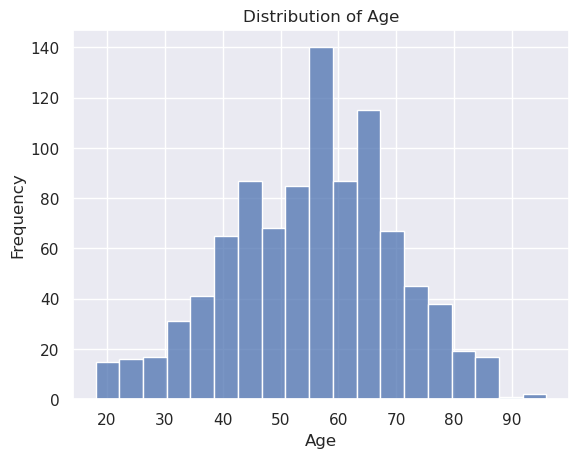

In [13]:
# Output for Project
visualize_age("mammographic_masses.csv")

In [14]:
def visualize_attributes(file_path):
    """
    Visualizes the categorical attributes in the dataset as countplots

    Parameters:
    - file_path (str): path to CSV file

    Returns:
    - ax1, ax2, ax3, ax4: Subplots that represent countplots for each categorical
    attribute
    """

    # Load in the data
    data = pd.read_csv(file_path)

    # List of categorical attributes to plot
    attributes = ["BI-RADS", "Shape", "Margin", "Density"]

    # Create FacetGrid of countplots for each attribute
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 10))
    for attribute, ax in zip(attributes, [ax1, ax2, ax3, ax4]):
        sns.countplot(x=attribute, hue="Severity", data=data, ax=ax)
        ax.set_title(f'Count Plot of {attribute} by Severity')

        # Add counts on the bars
        for p in ax.patches:
            for p in ax.patches:
                height = int(p.get_height())
                ax.text(p.get_x()+p.get_width()/2., height + 0.1,height,
                        ha="center", fontsize=10)

    
    return ax1, ax2, ax3, ax4


def visualize_attributes_test(file_path):
    
    # Call the visualize_attributes function with the test data
    ax1, ax2, ax3, ax4 = visualize_attributes(file_path)

    # Assert there are 4 subplots
    assert len([ax1, ax2, ax3, ax4]) == 4, "Expected 4 subplots but found a different number"

    # Expected attributes for each subplot
    expected_attributes = ["BI-RADS", "Shape", "Margin", "Density"]

    # Assert each subplot represents the correct column
    for ax, attribute in zip([ax1, ax2, ax3, ax4], expected_attributes):
        assert ax.title.get_text() == f"Count Plot of {attribute} by Severity", (
            f"Unexpected title for subplot {attribute}")

    plt.close()


visualize_attributes_test("mammographic_masses_test.csv")      

(<Axes: title={'center': 'Count Plot of BI-RADS by Severity'}, xlabel='BI-RADS', ylabel='count'>,
 <Axes: title={'center': 'Count Plot of Shape by Severity'}, xlabel='Shape', ylabel='count'>,
 <Axes: title={'center': 'Count Plot of Margin by Severity'}, xlabel='Margin', ylabel='count'>,
 <Axes: title={'center': 'Count Plot of Density by Severity'}, xlabel='Density', ylabel='count'>)

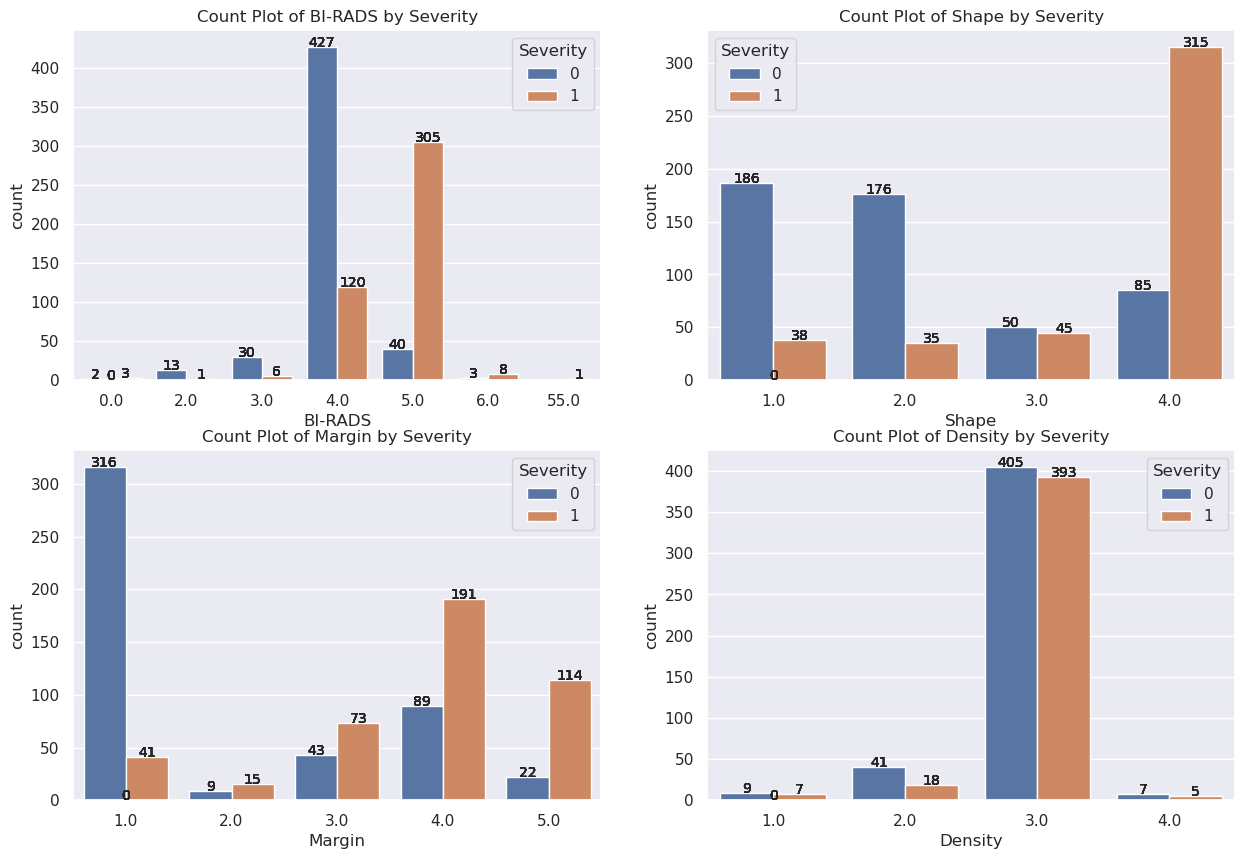

In [15]:
# Output for Project
visualize_attributes("mammographic_masses.csv")

In [16]:
def interactive_plot(file_path):
    """
    Creates an interactive scatter matric plot of categorical attributes

    Parameters:
    - file_path (str): path to CSV file

    Returns:
    - fig: Interactive scatter matrix plot
    """
    
    # Load the data
    data = pd.read_csv(file_path)

    # Drop rows with NaN values
    data.dropna(inplace=True)
    
    # Create scatter matrix plot
    fig = px.scatter_matrix(
        data,
        dimensions=["BI-RADS", "Age", "Shape", "Margin", "Density"],
        color="Severity",
        title="Scatter Matrix of Mammographic Masses Dataset",
        labels={
            "BI-RADS": "BI-RADS",
            "Age": "Age",
            "Shape": "Shape",
            "Margin": "Margin",
            "Density": "Density",
            "Severity": "Severity"
        },
        category_orders={"Severity": [0, 1]}
    )
    
    return fig

def interactive_plot_test(file_path):

    # Call the interactive_plot function
    fig = interactive_plot(file_path)
    
    # Assert the size of the scatter matrix plot
    assert fig is not None, "interactive_plot returned None"

plots = interactive_plot_test("mammographic_masses_test.csv")

In [17]:
# Output for Project
fig = interactive_plot("mammographic_masses.csv")
fig.show(renderer='iframe')

Link to Plotly Image: https://github.com/mehasingal/cse_final_project/blob/main/plotly.png?raw=true

## Model Training and Testing

## Iteration 1: Using `Margin` and `BI-RADS`

For this first iteration, we will be using `DecisionTreeClassifer`, `LogisticRegression`, and `KNeighborsClassifier` models to predict the `Severity` response variable based on the `f1` scores.

### Decision Tree Model

In [18]:
def decision_tree_iteration1(file_path, show_plot=True, verbose=3):

    data = pd.read_csv(file_path)
    
    # Define features and target variables
    X = data[["Margin", "BI-RADS"]]
    y = data["Severity"]
    
    
    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=42)

    # Defining hyperparameters
    param_grid={"max_depth": [3, 5, 7, 9]}

    # Grid search with cross-validation
    search = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid=param_grid,
        scoring="f1",
        verbose=verbose,
        cv=5
    )

    # Fitting the model
    search.fit(X_train, y_train)
    
    # Select best model
    reg = search.best_estimator_

    # Retrieve best mean score
    best_score = search.best_score_

    # Predict on test set
    y_pred = reg.predict(X_test)
    
    # Calculate F1 score on test set
    f1 = f1_score(y_test, y_pred)

    # Plotting the decision tree
    if show_plot:
        plt.figure(dpi=300)
        plot_tree(
            reg,
            feature_names=X.columns,
            label="root",
            filled=True,
            impurity=False,
            proportion=True,
            rounded=False,
            max_depth=3)
        plt.show()

    return best_score, f1


def decision_tree_iteration1_test(file_path):
    
    # Call the decision_tree_iteration1 function with the test dataset
    best_score, test_f1_score = decision_tree_iteration1(file_path,
                                                         show_plot=False,
                                                         verbose=0)
    
    # Assert returned values are of the correct type
    assert isinstance(best_score, float), "Best score should be a float"
    assert isinstance(test_f1_score, float), "Test F1 score should be a float"

    # Assert F1 score is within a valid range
    assert 0 <= test_f1_score <= 1, "Test F1 score should be between 0 and 1"
    assert 0 <= best_score <= 1, "Best score should be between 0 and 1"
    
decision_tree_iteration1_test("mammographic_masses.csv")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .......................max_depth=3;, score=0.832 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.783 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.756 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.776 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.828 total time=   0.0s
[CV 1/5] END .......................max_depth=5;, score=0.832 total time=   0.0s
[CV 2/5] END .......................max_depth=5;, score=0.783 total time=   0.0s
[CV 3/5] END .......................max_depth=5;, score=0.787 total time=   0.0s
[CV 4/5] END .......................max_depth=5;, score=0.776 total time=   0.0s
[CV 5/5] END .......................max_depth=5;, score=0.857 total time=   0.0s
[CV 1/5] END .......................max_depth=7;, score=0.832 total time=   0.0s
[CV 2/5] END .......................max_depth=7;,

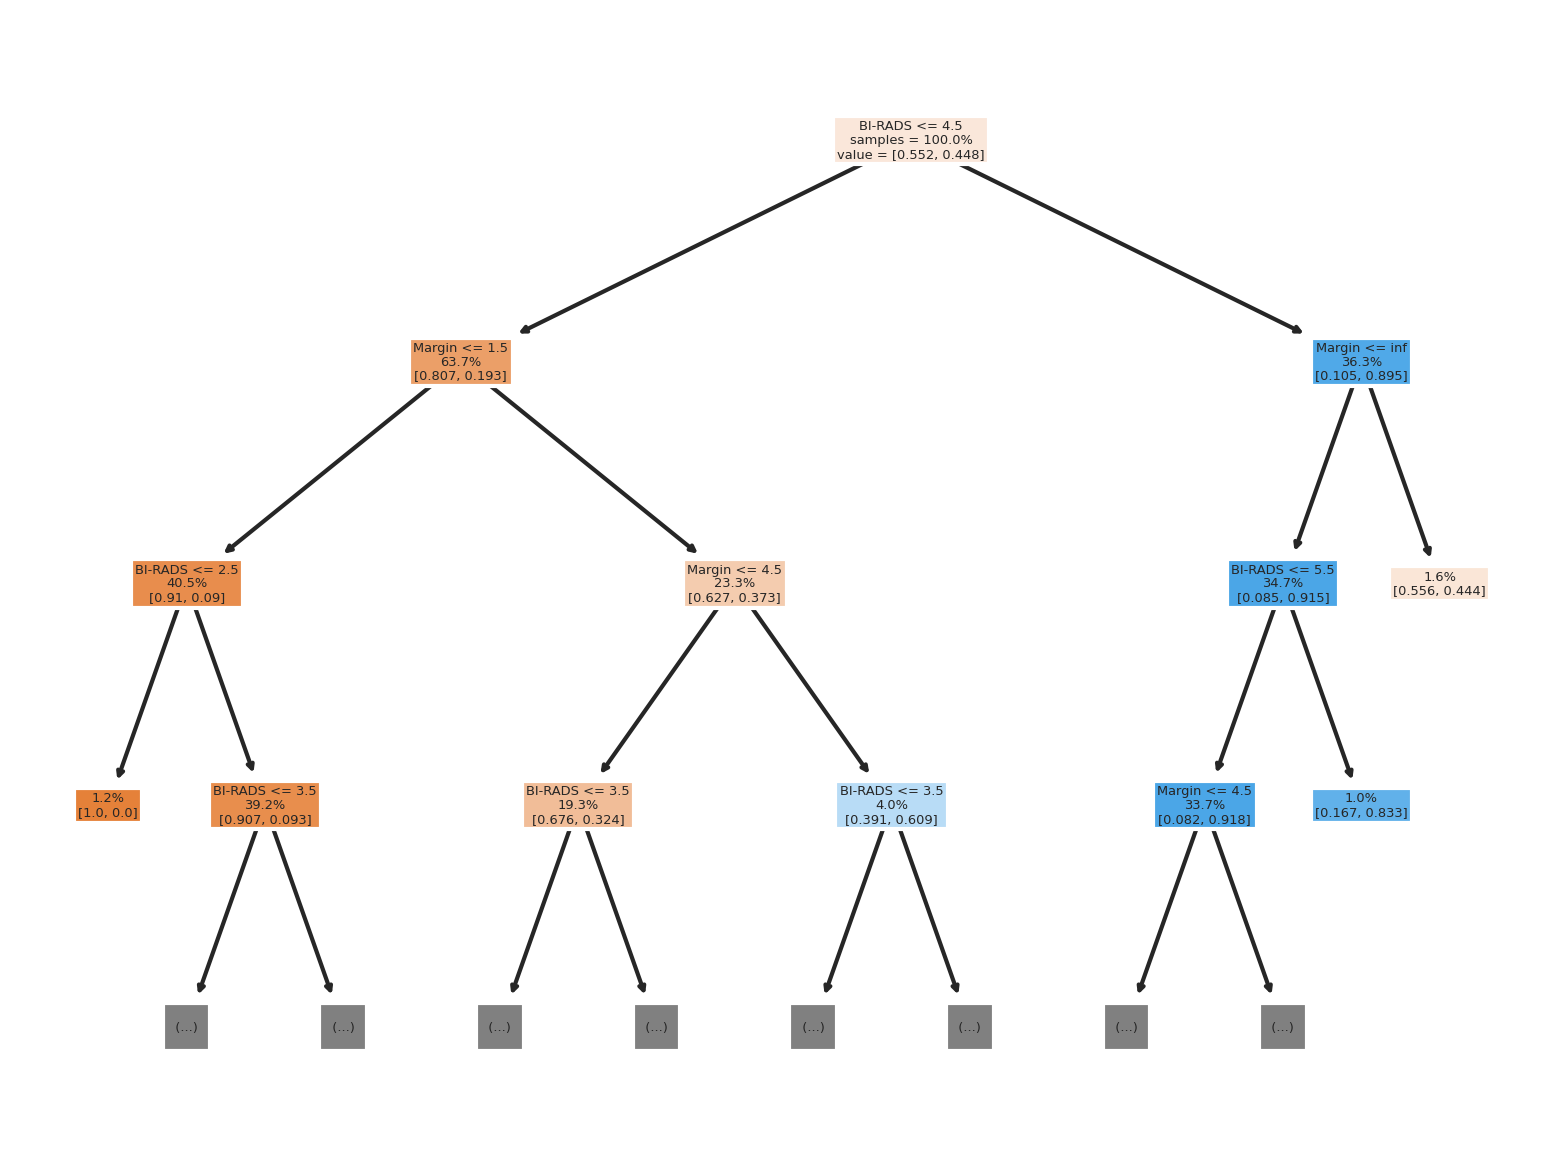

Mean F1 score from best model 0.8068357935493374
F1 score on test set: 0.7813411078717201


In [19]:
# Output for Project
best_score, test_f1_score = decision_tree_iteration1("mammographic_masses.csv",
                                                     show_plot=True,
                                                     verbose=3)
print("Mean F1 score from best model", best_score)
print("F1 score on test set:", test_f1_score)

### Logistic Regression Model

In [20]:
def logistic_regression_iteration1(file_path, verbose=3):

    data = pd.read_csv(file_path)

    # Drop rows with NaN values
    data.dropna(inplace=True)
    
    # Define features and target variables
    X = data[["Margin", "BI-RADS"]]
    y = data["Severity"]
    
    
    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=42)
    # Initializing the model
    reg = LogisticRegression()
    
    # Grid search with cross-validation
    param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
    search = GridSearchCV(
        estimator=reg,
        param_grid=param_grid,
        scoring="f1",
        verbose=verbose,
        cv=5
    )

    # Fitting the model
    search.fit(X_train, y_train)
    
    # Select the best model from grid search
    best_reg = search.best_estimator_

    # Retrieve best mean score from grid search
    best_score = search.best_score_
    
    # Predict on test set with the best model
    y_pred = best_reg.predict(X_test)
    
    # Calculate F1 score on test set
    f1 = f1_score(y_test, y_pred)

    return best_score, f1


def logistic_regression_iteration1_test(file_path):
    
    # Call the decision_tree_iteration1 function with the test dataset
    best_score, test_f1_score = logistic_regression_iteration1(file_path,
                                                               verbose=0)
    
    # Assert returned values are of the correct type
    assert isinstance(best_score, float), "Best score should be a float"
    assert isinstance(test_f1_score, float), "Test F1 score should be a float"

    # Assert F1 score is within a valid range
    assert 0 <= test_f1_score <= 1, "Test F1 score should be between 0 and 1"
    assert 0 <= best_score <= 1, "Best score should be between 0 and 1"
    
logistic_regression_iteration1_test("mammographic_masses.csv")

In [21]:
# Output for Project
best_score, test_f1_score = logistic_regression_iteration1("mammographic_masses.csv")
print("Mean F1 score from best model", best_score)
print("F1 score on test set:", test_f1_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................C=0.001;, score=0.721 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.711 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.756 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.703 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.761 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.769 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.816 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.833 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.737 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.837 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.787 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

### K Nearest Neighbors Classifer Model

In [22]:
def k_neighbors_iteration1(file_path):

    data = pd.read_csv(file_path)

    # Drop rows with NaN values
    data.dropna(inplace=True)
    
    # Define features and target variables
    X = data[["Margin", "BI-RADS"]]
    y = data["Severity"]
    
    
    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=42)

    knn = KNeighborsClassifier(n_neighbors=4)
    
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Calculate F1 score on test set
    f1 = f1_score(y_test, y_pred)

    # comparing actual response values (y_test) with predicted response values (y_pred)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    
    return f1, accuracy_score

def k_neighbors_iteration1_test(file_path):
    
    # Call the function
    test_f1_score, test_accuracy = k_neighbors_iteration1(file_path)
    
    # Assert returned values are of the correct type
    assert isinstance(test_f1_score, float), "Test F1 score should be a float"
    assert isinstance(test_accuracy, float), "Accuracy score should be a float"

    # Assert F1 score and accuracy is within a valid range
    assert 0 <= test_f1_score <= 1, "Test F1 score should be between 0 and 1"
    assert 0 <= test_accuracy <= 1, "Test accuracy score should be between 0 and 1"
    
    return None
    
k_neighbors_iteration1_test("mammographic_masses.csv")

In [23]:
# Output for Project
f1_knn_score, accuracy_score= k_neighbors_iteration1("mammographic_masses.csv")
print("F1 score for KNN model:", f1_knn_score)
print("Accuracy score for KKN model:", accuracy_score)

F1 score for KNN model: 0.8245125348189415
Accuracy score for KKN model: 0.8102409638554217


## Iteration 2: Using all Attributes

For the second iteration, we will be using all of the attributes (`Margin`, `BI-RADS`, `Shape`, `Density`, `Age`) to predict `Severity`. We will again be comparing the models of `DecisionTreeClassifer`, `LogisticRegression`, and `KNeighborsClassifier` based on their `f1` scores.

### Decision Tree Model

In [24]:
def decision_tree_iteration2(file_path, show_plot=True, verbose=3):

    data = pd.read_csv(file_path)
    
    # Define features and target variables
    X = data.drop(columns=['Severity'])
    y = data["Severity"]
    
    
    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=42)

    # Defining hyperparameters
    param_grid={"max_depth": [3, 5, 7, 9]}

    # Grid search with cross-validation
    search = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid=param_grid,
        scoring="f1",
        verbose=verbose,
        cv=5
    )

    # Fitting the model
    search.fit(X_train, y_train)
    
    # Select best model
    reg = search.best_estimator_

    # Retrieve best mean score
    best_score = search.best_score_

    # Predict on test set
    y_pred = reg.predict(X_test)
    
    # Calculate F1 score on test set
    f1 = f1_score(y_test, y_pred)

    # Plotting the decision tree
    if show_plot:
        plt.figure(dpi=300)
        plot_tree(
            reg,
            feature_names=X.columns,
            label="root",
            filled=True,
            impurity=False,
            proportion=True,
            rounded=False,
            max_depth=3)
        plt.show()

    return best_score, f1

def decision_tree_iteration2_test(file_path):
    
    # Call the decision_tree_iteration1 function with the test dataset
    best_score, test_f1_score = decision_tree_iteration2(file_path,
                                                         show_plot=False, verbose=0)
    
    # Assert returned values are of the correct type
    assert isinstance(best_score, float), "Best score should be a float"
    assert isinstance(test_f1_score, float), "Test F1 score should be a float"

    # Assert F1 score is within a valid range
    assert 0 <= test_f1_score <= 1, "Test F1 score should be between 0 and 1"
    assert 0 <= best_score <= 1, "Best score should be between 0 and 1"
    
decision_tree_iteration2_test("mammographic_masses.csv")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .......................max_depth=3;, score=0.851 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.821 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.784 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.766 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.835 total time=   0.0s
[CV 1/5] END .......................max_depth=5;, score=0.800 total time=   0.0s
[CV 2/5] END .......................max_depth=5;, score=0.800 total time=   0.0s
[CV 3/5] END .......................max_depth=5;, score=0.755 total time=   0.0s
[CV 4/5] END .......................max_depth=5;, score=0.776 total time=   0.0s
[CV 5/5] END .......................max_depth=5;, score=0.833 total time=   0.0s
[CV 1/5] END .......................max_depth=7;, score=0.811 total time=   0.0s
[CV 2/5] END .......................max_depth=7;,

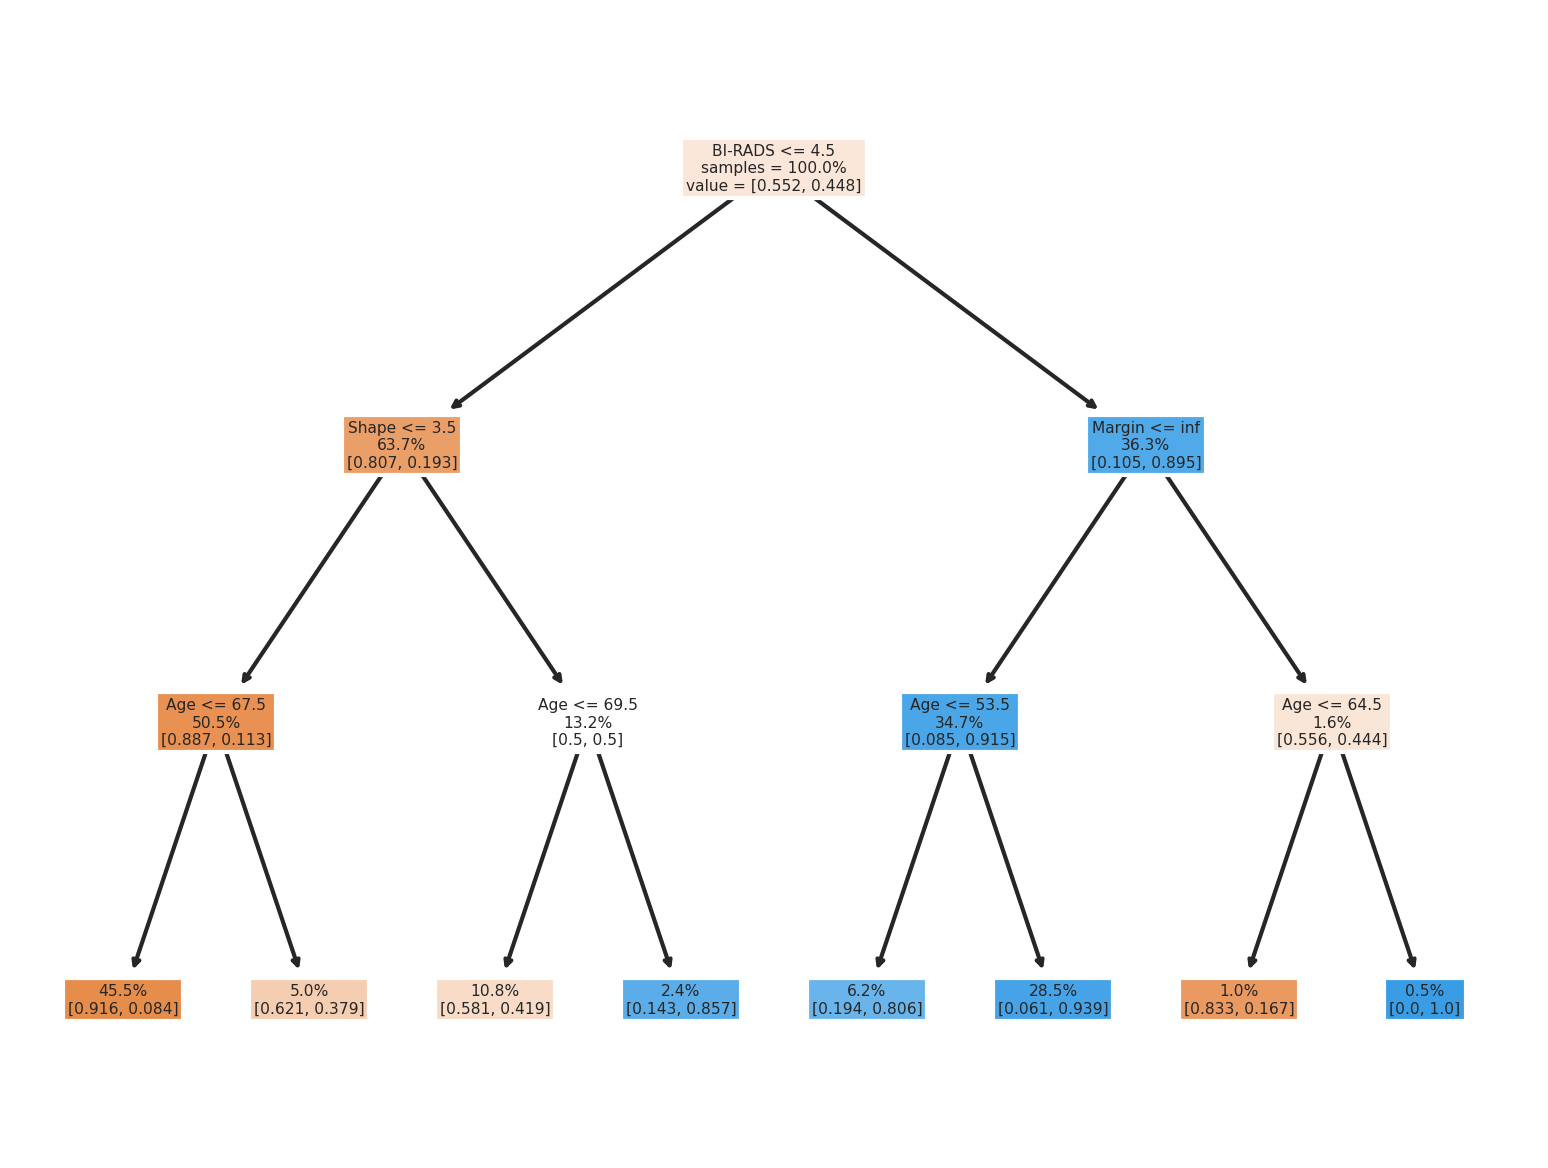

Mean F1 score from best model 0.811433043341264
F1 score on test set: 0.7836257309941521


In [25]:
best_score, test_f1_score = decision_tree_iteration2("mammographic_masses.csv",
                                                     show_plot=True, verbose=3)
print("Mean F1 score from best model", best_score)
print("F1 score on test set:", test_f1_score)

### Logistic Regression Model

In [26]:
def logistic_regression_iteration2(file_path, verbose=3):

    data = pd.read_csv(file_path)

    # Drop rows with NaN values
    data.dropna(inplace=True)
    
    # Define features and target variables
    X = data.drop(columns=['Severity'])
    y = data["Severity"]
    
    
    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=42)
    # Initializing the model
    reg = LogisticRegression()
    
    # Grid search with cross-validation
    param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
    search = GridSearchCV(
        estimator=reg,
        param_grid=param_grid,
        scoring="f1",
        verbose=verbose,
        cv=5
    )

    # Fitting the model
    search.fit(X_train, y_train)
    
    # Select the best model from grid search
    best_reg = search.best_estimator_

    # Retrieve best mean score from grid search
    best_score = search.best_score_
    
    # Predict on test set with the best model
    y_pred = best_reg.predict(X_test)
    
    # Calculate F1 score on test set
    f1 = f1_score(y_test, y_pred)

    return best_score, f1



def logistic_regression_iteration2_test(file_path):
    
    # Call the decision_tree_iteration1 function with the test dataset
    best_score, test_f1_score = logistic_regression_iteration2(file_path,
                                                               verbose=0)
    
    # Assert returned values are of the correct type
    assert isinstance(best_score, float), "Best score should be a float"
    assert isinstance(test_f1_score, float), "Test F1 score should be a float"

    # Assert F1 score is within a valid range
    assert 0 <= test_f1_score <= 1, "Test F1 score should be between 0 and 1"
    assert 0 <= best_score <= 1, "Best score should be between 0 and 1"
    
logistic_regression_iteration2_test("mammographic_masses.csv")

In [27]:
best_score, test_f1_score = logistic_regression_iteration2("mammographic_masses.csv",
                                                           verbose=3)
print("Mean F1 score from best model", best_score)
print("F1 score on test set:", test_f1_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................C=0.001;, score=0.755 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.692 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.737 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.652 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.735 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.809 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.800 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.812 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.725 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.768 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.809 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

### K Nearest Neighbors Classifer Model

In [28]:
def k_neighbors_iteration2(file_path):

    data = pd.read_csv(file_path)

    # Drop rows with NaN values
    data.dropna(inplace=True)
    
    # Define features and target variables
    X = data.drop(columns=['Severity'])
    y = data["Severity"]
    
    
    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=42)
    # Initialize model
    knn = KNeighborsClassifier(n_neighbors=3)

    # Fit the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Calculate F1 score on test set
    f1 = f1_score(y_test, y_pred)

    # comparing actual response values (y_test) with predicted response values (y_pred)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    
    return f1, accuracy_score


def k_neighbors_iteration2_test(file_path):
    
    # Call the function
    test_f1_score, test_accuracy = k_neighbors_iteration2(file_path)
    
    # Assert returned values are of the correct type
    assert isinstance(test_f1_score, float), "Test F1 score should be a float"
    assert isinstance(test_accuracy, float), "Accuracy score should be a float"

    # Assert F1 score and accuracy is within a valid range
    assert 0 <= test_f1_score <= 1, "Test F1 score should be between 0 and 1"
    assert 0 <= test_accuracy <= 1, "Test accuracy score should be between 0 and 1"
    
    return None
    
k_neighbors_iteration2_test("mammographic_masses.csv")

In [29]:
# Output for Project
f1_knn_score, accuracy_score= k_neighbors_iteration2("mammographic_masses.csv")
print("F1 score for KNN model:", f1_knn_score)
print("Accuracy score for KKN model:", accuracy_score)

F1 score for KNN model: 0.813953488372093
Accuracy score for KKN model: 0.8072289156626506


## Results

### How accurately can machine learning algorithms predict the severity (benign or malignant) of breast masses based on mammographic attributes?

After testing two different iterations of 3 scikit-learn models, the results have showed that the algorithms have predicted the severity of breast masses on testing datasets at a moderately accuracte rate. The three scikit models that I used were `DecisionTreeClassifier`, `LogisticRegression`, and `KNeighborsClassifier`. For iteration 1, I decided to predict `Severity` based on the attributes of `Shape` and `BI-RADS`, after testing out all the attributes and observing the varied distributions of the variables from the countplots, those two variables together gave me the highest best mean `F1` score. For the second iteration, I decided to use all of the variables to predict `Severity`. Since the dataset was quite straightforward and has been used in the past for ML models, as well as the predictive `Severity` variable being binary, I was not surprised at the high accuracy scores. I decided to base the accuracy off of `F1` scores and cross validation since `F1` is typically the best suited choice for predicting binary variables, as opposed to a negative root mean squared error, like we used for the Predicting Magnitude journal since the predictive variable was numerical. For iteration 1, the best `F1` mean score and the best `F1` test score came very close between the `LogisticRegression` model and the `KNeighborsClassifier`, with both `F1` score on a test set being about 0.82. However, the logistic regression model also had a lower mean `F1` score when searching through the cross-validation folds, of about 0.80. Since cross-validation is not as easily performed on `KNeighborsClassifier` models, I decide to include an accuracy score instead, which ended up scoring about 0.81, which is a generally great accuracy score for a machine learning model. Since these scores are graded on a range of 0 to 1, with percentages closest to 1 being the most accurate predictive, models, machine learning algorithms can be created to help assist in identifying breast mass severity based on patterns in attributes, with up to 82% accuracy with very little hyperparameter tuning.

### Which combination of mammographic attributes contributes most significantly to predicting breast mass severity?

The combination of mammographic attributes that contributed most significantly in predicting breast mass severity depends on the type of scikit model it was being performed on. While I previously discussed why I ended up choosing `Shape` and `BI-RADS` as the attributes used to predict `Severity` in the first iteration, the reason why I chose to include all variables in the 2nd one was because of the many factors that go into diagnosing a mass. Simple limiting my models to one or two attributes seemed too simple when there were only 5 total attributes in the dataset. I wanted to see what the scores would turn out as, even though I knew the risk of overfitting a model with too many influentional variables that can drag down a predictive `F1` score. Overall, while the model's impact on the scores will be discussed for a different question, the `F1` scores ended up being slightly higher in the iteration that used all of the attributes, `Shape`, `BI-RADS`, `Age`, `Margin`, and `Density` in predicting the binary `Severity`. This conclusion makes logistical sense, in that the diagnosis of a cancerous or benign legion cannot only be evaluated based on one or two attributes, medical professionals have to make their decision based on a number of factors. The higher the amount of factors, the more accurate the score could potentially become. However, in machine learning algorithms, there is the problem of overfitting, which means that there are too many variables to accurately predict because it looks too similar to the dataset itself. That is the biggest limitation of this question's results.


### Do certain machine learning algorithms perform better than others in predicting breast mass severity?

Yes, based on the results of my iterations and the differences in scores between my 3 scikit models, certain models performed better in predicting breast mass severity. I decided to go with `DecisionTreeClassifier` and `LogisticRegressionClassifier` as two of my models becuase those are two of the most commonly used machine learning models in predicting categorical, binary data, specifically emphasis on the `Classifier` part of the models, since there are other versions like `DecisionTreeRegressor` and `LinearRegression` models that work better in predicting numerical data, like we used in the Predicting Magnitudes journal. I decided to go with `KNeighborsClassifier` as my 3rd model because I have familiarity working with K-Means and the concept of clustering. To me, this method makes sense in using clusters to predict patterns in data. The different types of models ended up having an impact in the accuracy of the scores, depending on what variables they were using to predict. For iteration one, the `KNeighborsClassifier` had the highest test `F1` score of 0.82, with an accuracy score of 0.81, which trumps the mean `F1` score of 0.80 from the `LogisticRegressionClassifier` model which also came close in accuracy. For the second iteration, which uses all of the attributes to predict `Severity`, the logistic regression model performed the best, with a mean `F1` score of 0.82 and a test score of 0.84. The differences in performance could be due to the structure of certain models fitting better with the calculations of the model. For example, the `KNeighborsClassifier` may have performed better when predicting from less attributes, as opposed to 5, because it was easier for the model to make and find those clustered connections.

## Implications and Limitations

This project has significant implications for healthcare and medicine, potentially improving accuracy in diagnosing mammographic masses and benefiting both healthcare providers and patients through earlier and more accurate detection. However, there are important limitations, including potential reliance on automated algorithms, data quality and representativeness issues, as well as the risk of overfitting which could have been in an issue in this project. These limitations suggest that while the models can enhance and speed up the processes, they should be used as supplementary tools alongside expert judgment, with continuous validation and updates. They should not replace the role of medical professionals and their judgement, as they have access to much more patient information than an algorithm, including history, race, weight, medications, etc. The categorical nature of the dataset limits its accuracy in that it labels certain traits or attributes of the mass as belonging to one category only; this can lead to generalizations of abnormalities or the overlooking of new traits, especially in a fast-evolving situation like breast cancer.